In [29]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import csv
from collections import Counter

import gzip

In [27]:
skills_df = pd.read_csv("job_skills.csv")

jobs_df = pd.read_csv("linkedin_job_postings.csv")


In [26]:
skills_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [28]:
jobs_df.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [31]:
#filter to just the IT industry 

it_jobs = jobs_df[jobs_df["job_title"].str.contains('IT|Engineer|Developer|Software|Cyber|Data|Cloud', case=False, na=False)]
#case=False ignores upper/lowercase, na=False avoids breaking if a job title is missing 


#joins IT jobs with the skills_df, using job link as common key 
#how="inner" means keep jobs that exist in both datasets!
it_skills_df = it_jobs.merge(skills_df, on='job_link', how="inner")


In [32]:
#splits the skills strings into individual skills, stripping any whitespace and combining them into one big list
all_skills = []
for skill_list in it_skills_df["job_skills"].dropna(): 
    skills = [s.strip() for s in skill_list.split(',')]
    all_skills.extend(skills)
skill_counts = Counter(all_skills)

In [33]:
top_skills = skill_counts.most_common(20)
for skill, count in top_skills: 
    print(f"{skill}: {count}")

Communication: 66657
Teamwork: 40408
Leadership: 33611
Project Management: 29409
Collaboration: 22365
Problem Solving: 22146
Communication skills: 20653
Python: 19908
Communication Skills: 19498
Nursing: 17106
Troubleshooting: 15746
Problemsolving: 15472
Microsoft Office Suite: 15255
SQL: 13970
Microsoft Office: 13898
Project management: 13502
Data Analysis: 13097
Time Management: 12951
Engineering: 12907
Documentation: 12445


Text(0, 0.5, 'Skills')

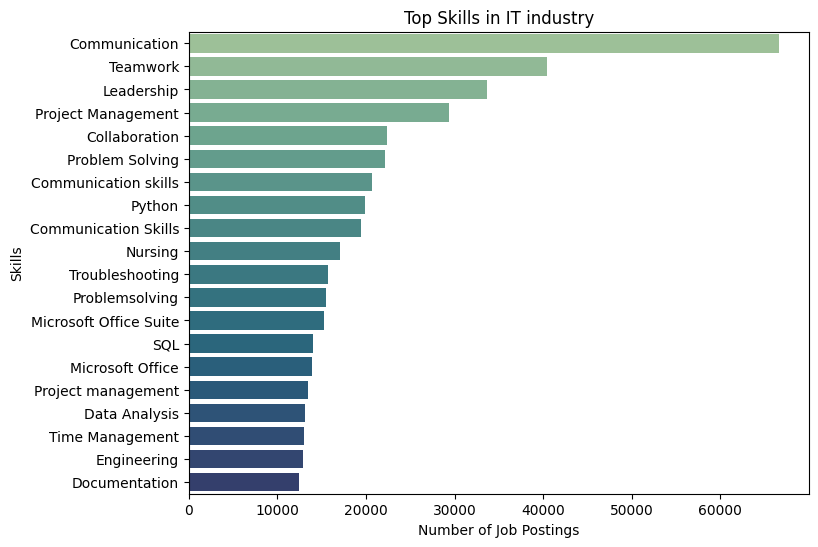

In [36]:
skills_data = pd.DataFrame(top_skills, columns=['Skill', 'Count'])
plt.figure(figsize=(8,6))
sns.barplot(
    data=skills_data,
    x="Count",
    y="Skill",
    hue="Skill",         
    palette="crest",
    legend=False        
)
plt.title("Top Skills in IT industry")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skills")

## Predictive Model: 
Building a model that predicts which skills will be in demand based on current trends! 